                                                     Final Project
Purpose of the project：

This project will try to examine how income level evolves in CA. and how it corresponds with the income inequality since the 2000s. In this project, we will study if there exists a positive, negative, or no relationship between regional income inequality and economic growth by analyzing the data of household income, total population, and GDP. Since there are many studies already showing the impact of income inequality such as higher rates of health and social problems, we want to think more about the effect on the level of economic growth.


Project structure：

The first part is the introduction of where the data comes from and how to access the data.

Second, the project will provide statistics on median household income in CA and illustrate how wealth is spread causing income equality over time. It may also contain visual graphs to visually inspect different interesting events at different times.

Moreover, we will provide a data report of the GDP growth in the content of the CA population.

Lastly, a hypothesis will be tested and compared with the previous academic conclusions. The project will provide further analysis by calculating and comparing the data and plotting it to identify relationships.


Data report：

Overview of the data:

The data for this project comes from the Federal Reserve Economic Data website (FRED).
As mentioned above, their regional accounts data provides access to measures of economic activity in

-detailed date of mean and median household income and household income growth rate ratio data.

-GDP growth rate ratio and household income growth rate ratio.

The data can be accessed at https://fred.stlouisfed.org.



Key Variables:

The key series that I must retrieve is Median household income which is defined as :

“The median income is the income amount that divides a population into two equal groups, half having an income above that amount, and half having an income below that amount. It may differ from the mean (or average) income. The income that occurs most frequently is the income mode. Each of these is a way of understanding income distribution. Median income can be calculated by household income, by personal income, or for specific demographic groups.”
 
Besides, we will also use the US GDP to see the relationship with the Median household income change rate and GDP is defined as:

Gross domestic product (GDP) is the standard measure of the value added created through the production of goods and services in a country during a certain period. As such, it also measures the income earned from that production, or the total amount spent on final goods and services (less imports).

And we will use the Human capital and Residents population in CA. to help us in the project.

Human capital: Human capital is an intangible asset or quality not listed on a company's balance sheet. It can be classified as the economic value of a worker's experience and skills. This includes assets like education, training, intelligence, skills, health, and other things employers value such as loyalty and punctuality.

Residents population: we will also download Resident Population in California. According to FRED, Population estimates are updated annually using current data on births, deaths, and migration to calculate population change since the most recent decennial census. The annual time series of estimates begins with the most recent decennial census data and extends to the vintage year. Each vintage of estimates includes all years since the most recent decennial census.



In [2]:
#Key Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [6]:
#Access Data
url = 'http://research.stlouisfed.org/fred2/series/MEHOINUSCAA646N/downloaddata/MEHOINUSCAA646N.csv'
data = pd.read_csv(url, parse_dates=True)
data.head()

,DATE,VALUE
0,1984-01-01,25287
1,1985-01-01,26981
2,1986-01-01,29010
3,1987-01-01,30146
4,1988-01-01,30287


In [17]:
data.columns=['DATE','HOIN']

In [18]:
data.head()

,DATE,HOIN
0,1984-01-01,25287
1,1985-01-01,26981
2,1986-01-01,29010
3,1987-01-01,30146
4,1988-01-01,30287


In [19]:
#Summary Statistics for Median Household Income IN CA
data.describe()

,HOIN
count,36.000000
mean,47136.333333
std,13814.067271
min,25287.000000
25%,34695.500000
50%,47349.500000
75%,56354.000000
max,78105.000000


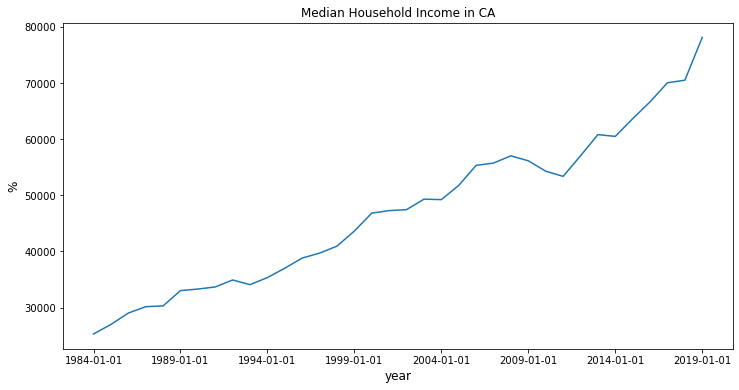

In [20]:
#Graphing Median Household Income in CA
data1=data.set_index('DATE')
ax = data1['1984':'2020'].plot(title='Median Household Income in CA', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

In [21]:
url_c = 'http://research.stlouisfed.org/fred2/series/CANGSP/downloaddata/CANGSP.csv'
data_c = pd.read_csv(url_c, parse_dates=True)
data_c.head()

,DATE,VALUE
0,1997-01-01,1071327.2
1,1998-01-01,1147944.3
2,1999-01-01,1247734.4
3,2000-01-01,1366166.5
4,2001-01-01,1387551.8


In [23]:
data_c.columns=['DATE', 'GDP']

In [24]:
data_c.head()

,DATE,GDP
0,1997-01-01,1071327.2
1,1998-01-01,1147944.3
2,1999-01-01,1247734.4
3,2000-01-01,1366166.5
4,2001-01-01,1387551.8


In [25]:
#Summary Statistics for GDP
data_c.describe()

,GDP
count,2.300000e+01
mean,1.970110e+06
std,5.879731e+05
min,1.071327e+06
25%,1.484951e+06
50%,1.955321e+06
75%,2.330294e+06
max,3.132801e+06


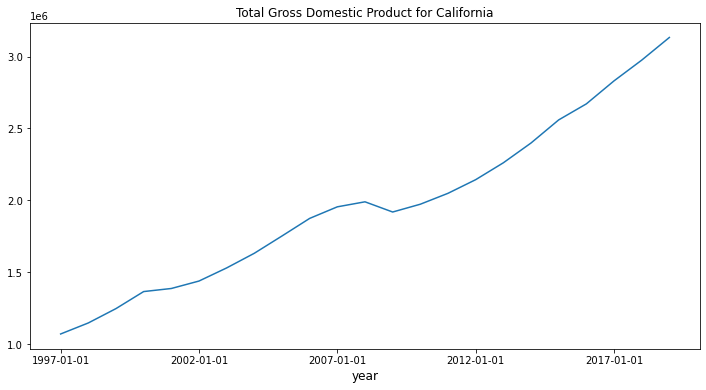

In [28]:
#Graphing Total Gross Domestic Product for California
data_c1=data_c.set_index('DATE')
ax = data_c1['1997':'2020'].plot(title='Total Gross Domestic Product for California', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
plt.show()

In [29]:
#Access Data
url = 'http://research.stlouisfed.org/fred2/series/CAPOP/downloaddata/CAPOP.csv'
data = pd.read_csv(url, parse_dates=True)
data.head()

,DATE,VALUE
0,1900-01-01,1490.0
1,1901-01-01,1550.0
2,1902-01-01,1623.0
3,1903-01-01,1702.0
4,1904-01-01,1792.0


In [30]:
data.columns=['DATE','POP']

In [31]:
data.head()

,DATE,POP
0,1900-01-01,1490.0
1,1901-01-01,1550.0
2,1902-01-01,1623.0
3,1903-01-01,1702.0
4,1904-01-01,1792.0


In [32]:
#Summary Statistics for Unemployment Rate
data.describe()

,POP
count,120.000000
mean,17415.863200
std,12709.353285
min,1490.000000
25%,5666.000000
50%,15668.500000
75%,29401.150750
max,39512.223000


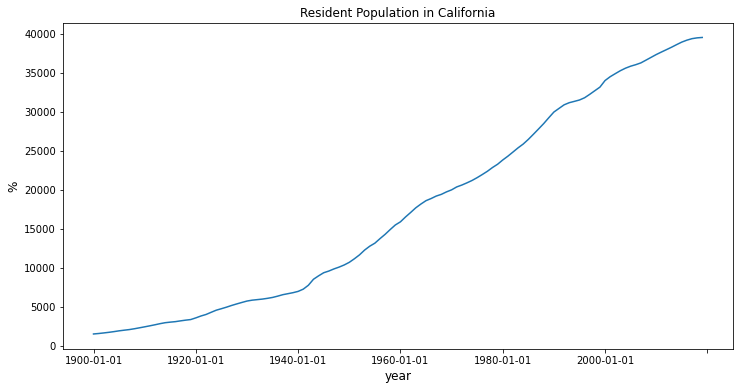

In [34]:
#Graphing the Resident Population in California
data1=data.set_index('DATE')
ax = data1['1900':'2020'].plot(title='Resident Population in California', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()